In [1]:
import oracles
import optimization
import plot_trajectory_2d
import numpy as np
import random
import scipy as sp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/calabaricus/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Experiment 1

Optimization task: 
 [[2 0]
 [0 1]] = A , b = [0 0] x_0 = [ 2.   4.8]

 Condition number of A:  2.0
 
 
 
 

 Optimisation type:       Constant

 Status of optimisation:  success [ 0.       0.01875]

 Number of iterations     8


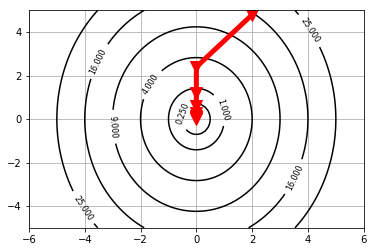


 Optimisation type:       Armijo

 Status of optimisation:  success [ 0.  0.]

 Number of iterations     2


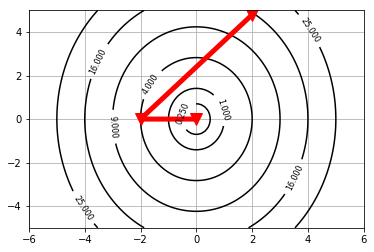


 Optimisation type:       Wolfe

 Status of optimisation:  success [ 0.  0.]

 Number of iterations     2


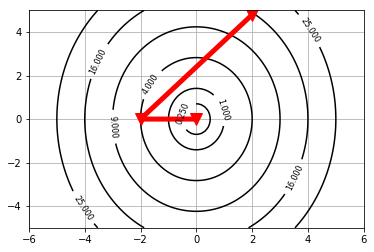

In [83]:
A = np.array([[2, 0], [0,1]])
b = np.array([0, 0])
x_0 = np.array([2, 4.8])
oracle = oracles.QuadraticOracle(A, b)
print("Optimization task: \n", A, "= A , b =", b, "x_0 =", x_0)
print("\n Condition number of A: ", np.linalg.cond(A), end='\n \n \n \n \n')  
    

optParamDict = {'method': None,
                'alpha_0': 1,
                'c1': 1e-4,
                'c2': 0.9,
                'c' : 1/2}
for method in ['Constant', 'Armijo', 'Wolfe']:
    optParamDict['method'] = method
    lst = optimization.get_line_search_tool(optParamDict)
    x_star, message, history = optimization.gradient_descent(oracle, 
                                                         x_0,
                                                         tolerance=1e-5, 
                                                         max_iter=10000,
                                                         line_search_options=lst, 
                                                         trace=True, 
                                                         display=False)
    
    print("\n Optimisation type:      ", optParamDict['method'])
    print("\n Status of optimisation: ", message, x_star)
    print("\n Number of iterations    ", len(history['func']) - 1)  
    
    plot_trajectory_2d.plot_levels(oracle.func)
    plot_trajectory_2d.plot_trajectory(oracle.func, history=history['x'])
    plt.show()

Optimization task: 
 [[15  0]
 [ 0  1]] = A , b = [0 0] x_0 = [ 2.   4.8]

 Condition number of A:  15.0
 
 
 
 

 Optimisation type:       Constant

 Status of optimisation:  success [ 0.          0.09404539]

 Number of iterations     57


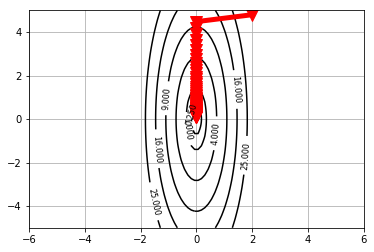


 Optimisation type:       Armijo

 Status of optimisation:  success [ 0.00561545  0.01347707]

 Number of iterations     44


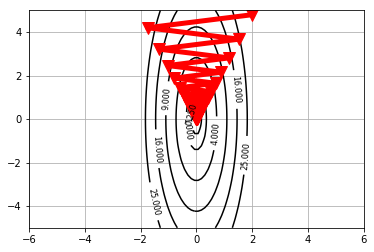


 Optimisation type:       Wolfe

 Status of optimisation:  success [ 0.  0.]

 Number of iterations     4


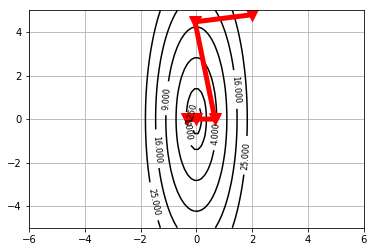

In [71]:
A = np.array([[15, 0], [0,1]])
b = np.array([0, 0])
x_0 = np.array([2,4.8])
oracle = oracles.QuadraticOracle(A, b)
print("Optimization task: \n", A, "= A , b =", b, "x_0 =", x_0)
print("\n Condition number of A: ", np.linalg.cond(A), end='\n \n \n \n \n')  
    

optParamDict = {'method': None,
                'alpha_0': 1,
                'c1': 1e-4,
                'c2': 0.9,
                'c' : 1/15}
for method in ['Constant', 'Armijo', 'Wolfe']:
    optParamDict['method'] = method
    lst = optimization.get_line_search_tool(optParamDict)
    x_star, message, history = optimization.gradient_descent(oracle, 
                                                         x_0,
                                                         tolerance=1e-5, 
                                                         max_iter=10000,
                                                         line_search_options=lst, 
                                                         trace=True, 
                                                         display=False)
    
    print("\n Optimisation type:      ", optParamDict['method'])
    print("\n Status of optimisation: ", message, x_star)
    print("\n Number of iterations    ", len(history['func']) - 1)  
    
    plot_trajectory_2d.plot_levels(oracle.func)
    plot_trajectory_2d.plot_trajectory(oracle.func, history=history['x'])
    plt.show()

# Experiment 2

In [14]:
random.seed(42)

GrSourceAllN=[]

for n in [10, 100, 1000, 10000]:
    listOfGrForFixedN = []
    
    for times in range(5):
        graphic = []
    
        for k in range(10, 501, 10):    
            #Генерируем случайные матрицы и вектора
            a = [1, k]
            for i in range(2, n):
                a.append(random.uniform(1, k))
            A = sp.sparse.diags(a)
            b = np.random.uniform(-2 * k, 2*k, n)
            x_0 = rand(n) * 3
            
            oracle = oracles.QuadraticOracle(A, b)
            optParamDict = {'method': 'Wolfe',
                            'alpha_0': 1,
                            'c1': 1e-4,
                            'c2': 0.9,
                            'c' : 1/15}
            lst = optimization.get_line_search_tool(optParamDict)
            x_star, message, history = optimization.gradient_descent(oracle, 
                                                         x_0,
                                                         tolerance=1e-5, 
                                                         max_iter=10000,
                                                         line_search_options=lst, 
                                                         trace=True, 
                                                         display=False)
            
            graphic.append(len(history['func']))
        listOfGrForFixedN.append(np.array(graphic))
    GrSourceAllN.append(listOfGrForFixedN)
    


/home/calabaricus/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


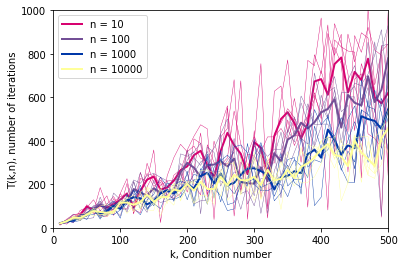

In [61]:

K = list(range(10, 501, 10))
colours = ['#D70270', '#734F96', '#0038A8', '#FFFF99']
for i in range(shape(GrSourceAllN)[0]):
    for gr in GrSourceAllN[i]:
        plot(K, gr,linewidth=0.4,  color=colours[i])
    plot(K, mean(GrSourceAllN[i], axis=0), linewidth=2, color=colours[i],  label='n = %d' %(10**(i+1)))
legend()
axis([0, 500, 0, 1000])
xlabel('k, Condition number')
ylabel('T(k,n), number of iterations')
savefig('graph.png', dpi = 400)